In [1]:
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')

df = pd.read_csv('../input/world-airports/World_Airports.csv')
df.head()

,X,Y,OBJECTID,id,airport_ident,type,name,latitude_deg,longitude_deg,elevation_ft,...,home_link,wikipedia_link,keywords,description,frequency_mhz,runway_length_ft,runway_width_ft,runway_surface,runway_lighted,runway_closed
0,-1.301162e+07,4.212194e+06,1,6528,00CA,small_airport,Goldstone (GTS) Airport,35.354740,-116.885329,3038.0,...,NaN,NaN,NaN,CTAF,122.9,6000.0,80.0,ASPH,0.0,0.0
1,-9.034601e+06,3.347916e+06,2,6589,01FL,small_airport,Cedar Knoll Flying Ranch Airport,28.781900,-81.159203,19.0,...,NaN,NaN,NaN,NaN,122.9,3000.0,50.0,TURF,1.0,0.0
2,-1.309952e+07,4.104774e+06,3,6756,04CA,small_airport,Gray Butte Field,34.563900,-117.675003,3020.0,...,NaN,NaN,NaN,CTAF,122.9,5000.0,150.0,ASPH,0.0,0.0
3,-1.011189e+07,3.887414e+06,4,6779,04MS,small_airport,Nick's Flying Service Inc Airport,32.940537,-90.836683,100.0,...,NaN,NaN,NaN,UNICOM,122.8,3400.0,100.0,ASPH-TURF,0.0,0.0
4,-1.287577e+07,4.267031e+06,5,6784,04NV,small_airport,Kingston Ranch Airport,35.755501,-115.665001,2620.0,...,NaN,NaN,NaN,UNICOM,123.0,3240.0,45.0,ASPH,1.0,0.0


In [2]:
df.dtypes

X                    float64
Y                    float64
OBJECTID               int64
id                     int64
airport_ident         object
type                  object
name                  object
latitude_deg         float64
longitude_deg        float64
elevation_ft         float64
continent             object
iso_country           object
iso_region            object
municipality          object
scheduled_service     object
gps_code              object
iata_code             object
local_code            object
home_link             object
wikipedia_link        object
keywords              object
description           object
frequency_mhz        float64
runway_length_ft     float64
runway_width_ft      float64
runway_surface        object
runway_lighted       float64
runway_closed        float64
dtype: object

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: >

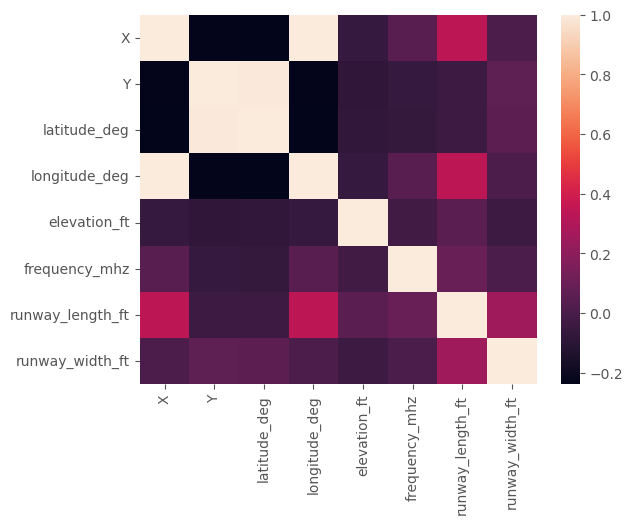

In [3]:
from seaborn import heatmap
heatmap(df[['X', 'Y', 'latitude_deg', 'longitude_deg', 'elevation_ft', 'frequency_mhz', 'runway_length_ft', 'runway_width_ft']].corr())

It looks like X ~ longitude and Y ~ latitude.

In [4]:
df[['X', 'Y', 'latitude_deg', 'longitude_deg', ]].corr()

,X,Y,latitude_deg,longitude_deg
X,1.000000,-0.229565,-0.238613,1.000000
Y,-0.229565,1.000000,0.994472,-0.229565
latitude_deg,-0.238613,0.994472,1.000000,-0.238601
longitude_deg,1.000000,-0.229565,-0.238601,1.000000


We kind of know that if we plot X vs Y we'll see a land map. Can we tell that by looking at X and Y as histograms?

<Axes: ylabel='Frequency'>

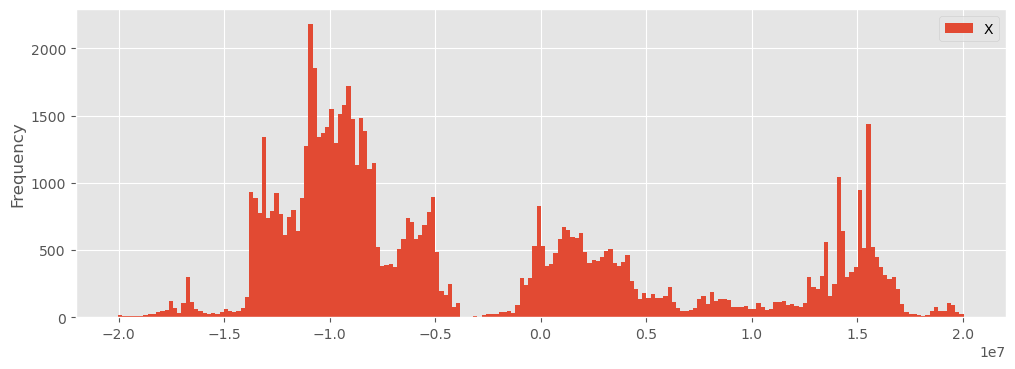

In [5]:
df['X'].plot.hist(bins=200, legend=True, figsize=(12, 4))

<Axes: ylabel='Frequency'>

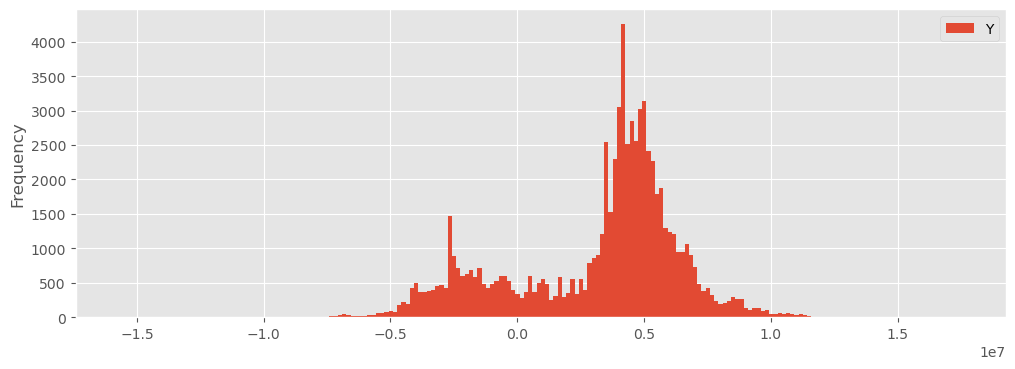

In [6]:
df['Y'].plot.hist(bins=200, legend=True, figsize=(12, 4))

<Axes: xlabel='X', ylabel='Y'>

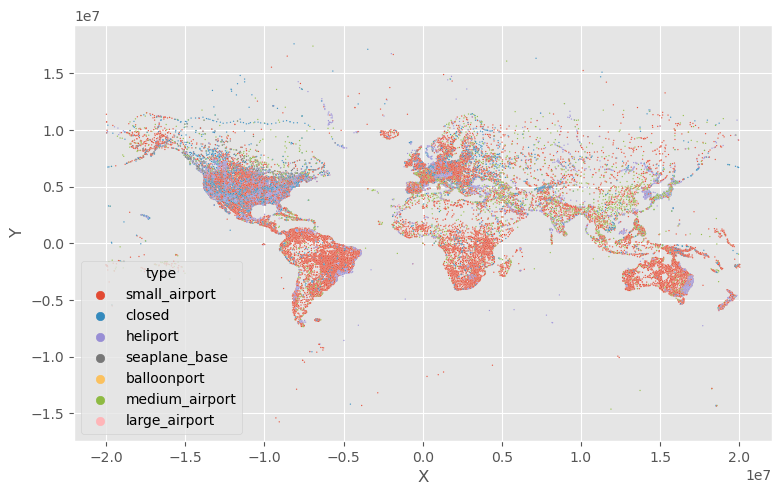

In [7]:
from seaborn import scatterplot
from matplotlib.pyplot import subplots
size = 9 # let's do a sloppy golden ratio size
fig, ax = subplots(figsize=(size, 0.6 * size))
scatterplot(data=df, x='X', y='Y', s=1, ax=ax, hue='type')

<Axes: xlabel='elevation_ft', ylabel='runway_length_ft'>

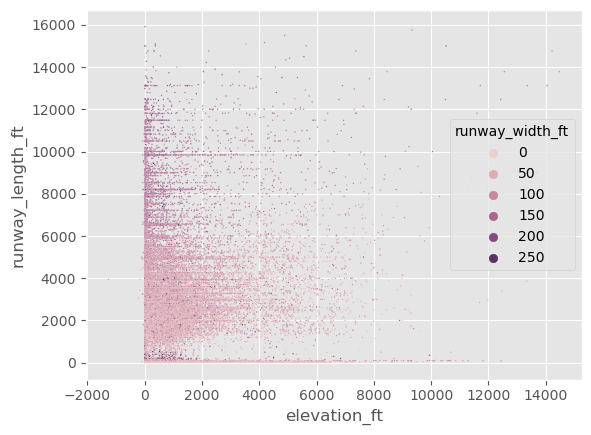

In [8]:
from seaborn import scatterplot
scatterplot(data=df[df['runway_width_ft'] < 300], s=1, x='elevation_ft', y='runway_length_ft', hue='runway_width_ft')

Clearly runways do not get longer as they get higher, and our runway width data is noisy.

<Axes: ylabel='Frequency'>

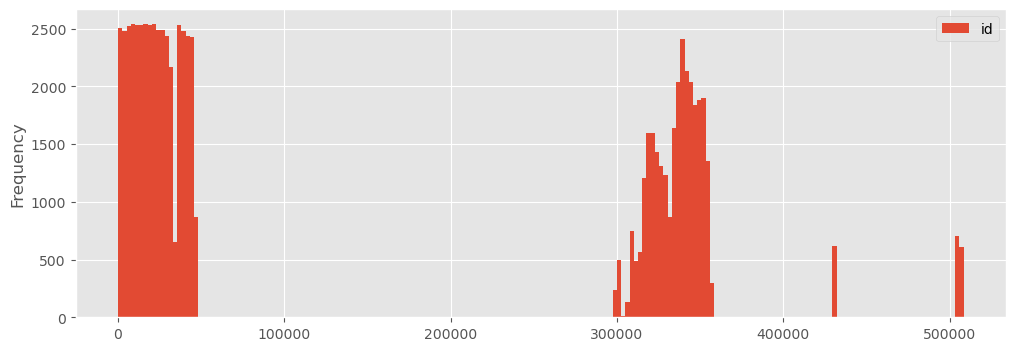

In [9]:
df['id'].plot.hist(bins=200, legend=True, figsize=(12, 4))

It looks like some other kind of information is coded into the ID. Can't imagine what that would be.

<Axes: ylabel='Frequency'>

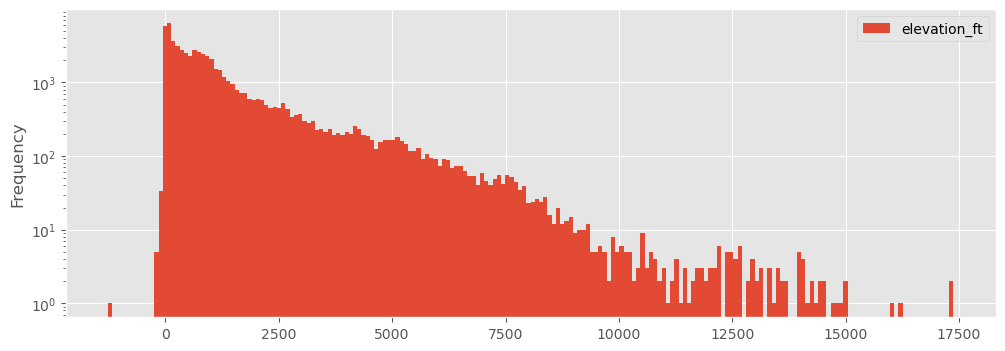

In [10]:
# these obviously cluster around zero, so let's use a log plot to get them to spread out
df['elevation_ft'].plot.hist(bins=200, legend=True, figsize=(12, 4), log=True)

<Axes: ylabel='Frequency'>

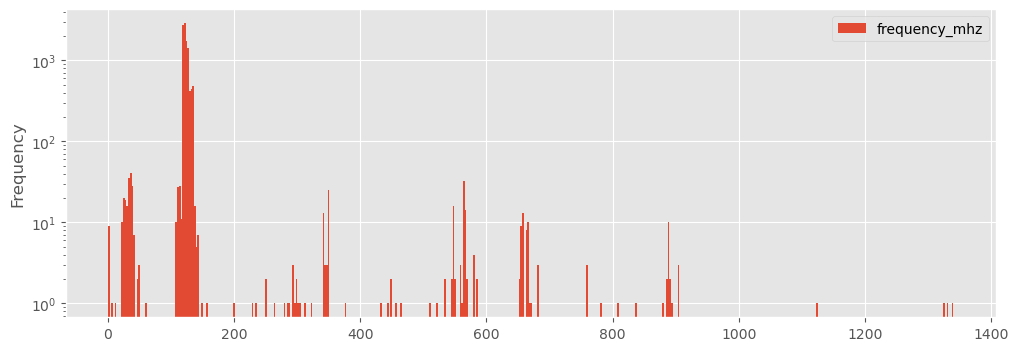

In [11]:
df['frequency_mhz'].plot.hist(bins=500, legend=True, figsize=(12, 4), log=True)

<Axes: ylabel='Frequency'>

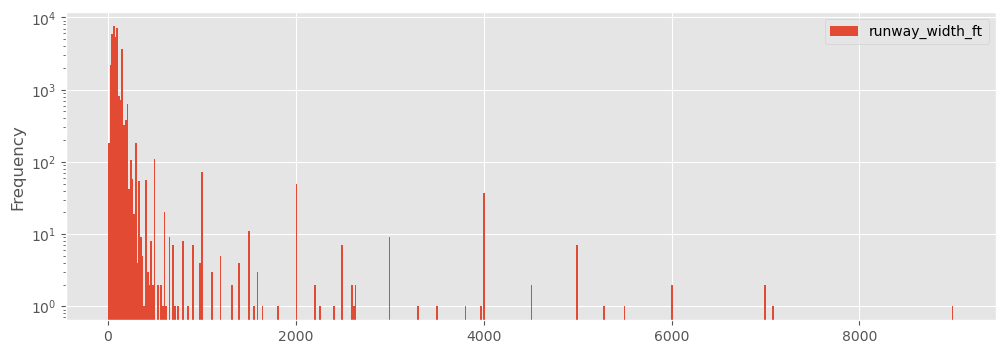

In [12]:
df['runway_width_ft'].plot.hist(bins=500, legend=True, figsize=(12, 4), log=True)

I find it difficult to believe there are runways more than 1000 ft wide.

<Axes: ylabel='runway_surface'>

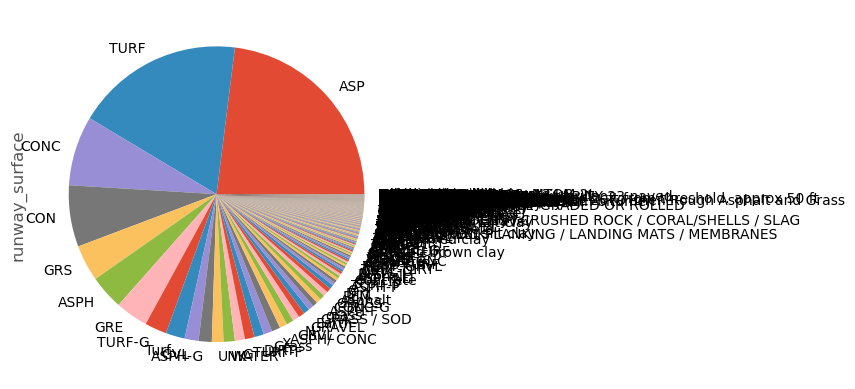

In [13]:
df['runway_surface'].value_counts().plot(kind='pie')

<Axes: ylabel='type'>

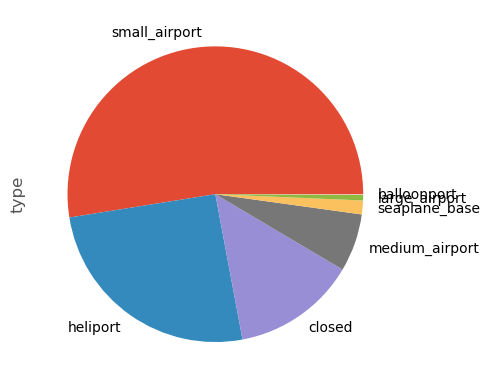

In [14]:
df['type'].value_counts().plot(kind='pie')

<Axes: ylabel='runway_lighted'>

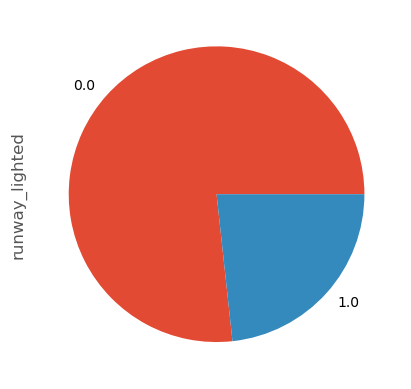

In [15]:
df['runway_lighted'].value_counts().plot(kind='pie')

<Axes: ylabel='runway_closed'>

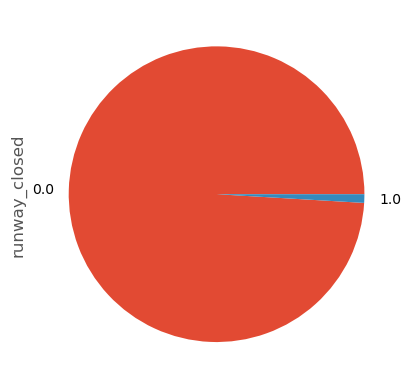

In [16]:
df['runway_closed'].value_counts().plot(kind='pie')